# Decision trees

*This tutorial is based on content from the excellent iOS app [Tinkerstellar](https://tinkerstellar.com).*

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification:

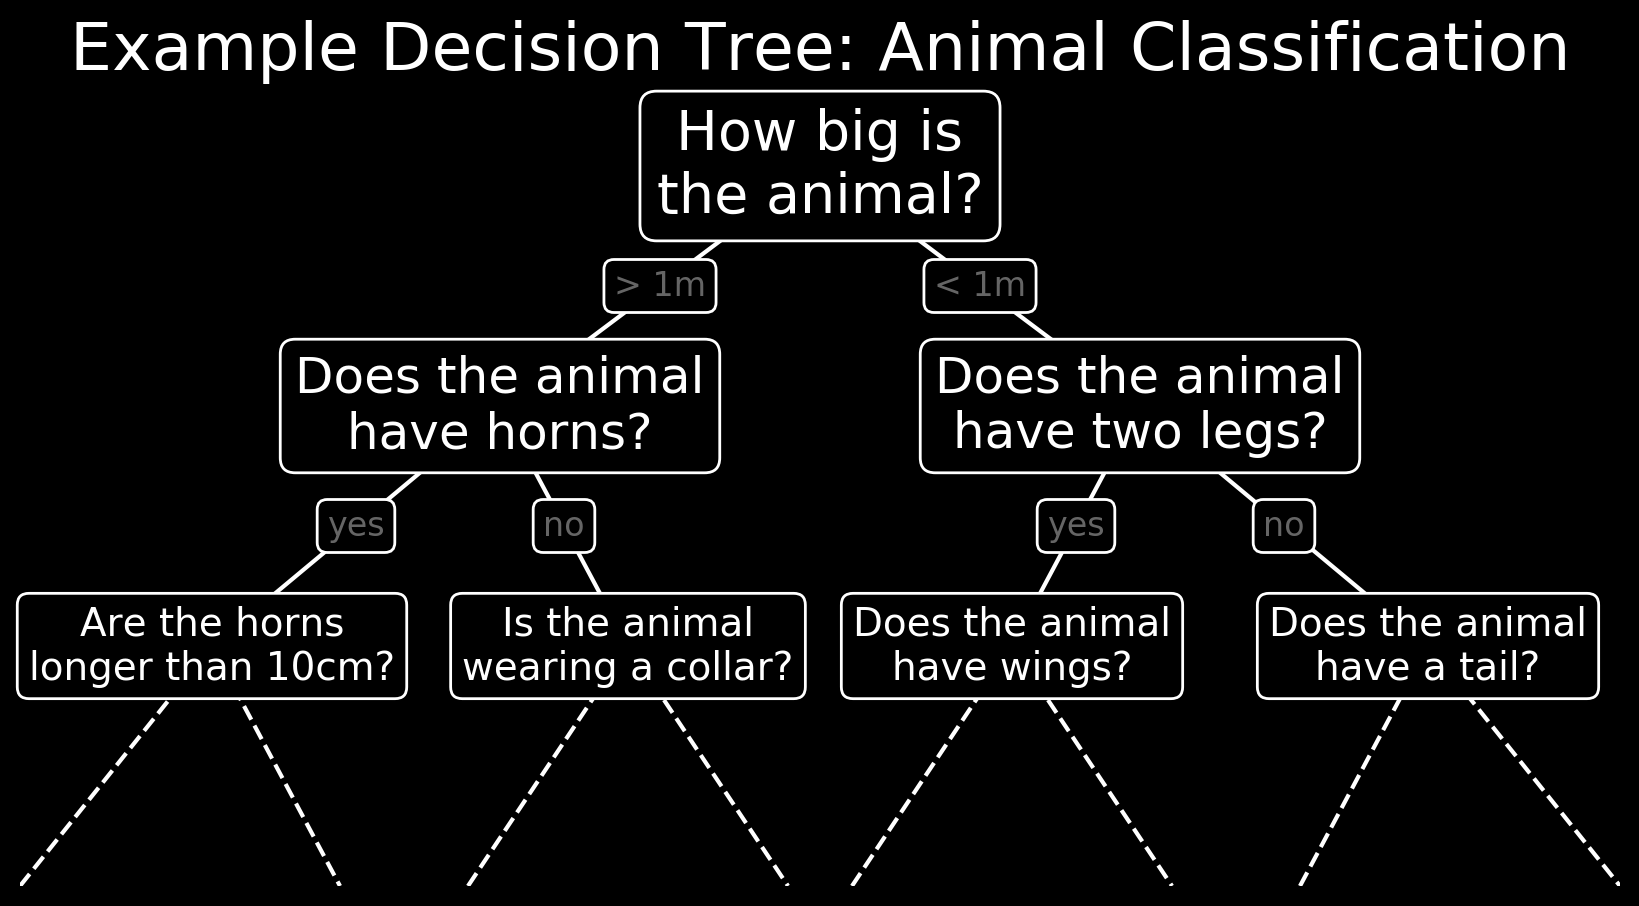

In [1]:
# HIDE CODE
import matplotlib.pyplot as plt

def plot_example_decision_tree():
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
    ax.set_title('Example Decision Tree: Animal Classification', size=24)
    # Disable color cycling for lines
    ax.set_prop_cycle(color=[plt.rcParams['lines.color']])

    def text(ax, x, y, t, size=20, **kwargs):
        ax.text(
            x, y, t, ha='center', va='center', size=size, 
            bbox=dict(boxstyle='round', ec=plt.rcParams['text.color'], fc=plt.rcParams['figure.facecolor']), 
            **kwargs
        )

    text(ax, 0.5, 0.9, "How big is\nthe animal?", 20)
    text(ax, 0.3, 0.6, "Does the animal\nhave horns?", 18)
    text(ax, 0.7, 0.6, "Does the animal\nhave two legs?", 18)
    text(ax, 0.12, 0.3, "Are the horns\nlonger than 10cm?", 14)
    text(ax, 0.38, 0.3, "Is the animal\nwearing a collar?", 14)
    text(ax, 0.62, 0.3, "Does the animal\nhave wings?", 14)
    text(ax, 0.88, 0.3, "Does the animal\nhave a tail?", 14)
    text(ax, 0.4, 0.75, "> 1m", 12, alpha=0.4)
    text(ax, 0.6, 0.75, "< 1m", 12, alpha=0.4)
    text(ax, 0.21, 0.45, "yes", 12, alpha=0.4)
    text(ax, 0.34, 0.45, "no", 12, alpha=0.4)
    text(ax, 0.66, 0.45, "yes", 12, alpha=0.4)
    text(ax, 0.79, 0.45, "no", 12, alpha=0.4)
    ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-')
    ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-')
    ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-')
    ax.plot([0.0, 0.12, 0.20], [0.0, 0.3, 0.0], '--')
    ax.plot([0.28, 0.38, 0.48], [0.0, 0.3, 0.0], '--')
    ax.plot([0.52, 0.62, 0.72], [0.0, 0.3, 0.0], '--')
    ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '--')
    ax.axis([0, 1, 0, 1])
    
plot_example_decision_tree()

The binary splitting makes the procedure very efficient. In training a decision tree classifier, the algorithm looks at the features and decides which questions (or "splits") contain the most information.

## Interactive example

Next, we use an example data with 4 centers.

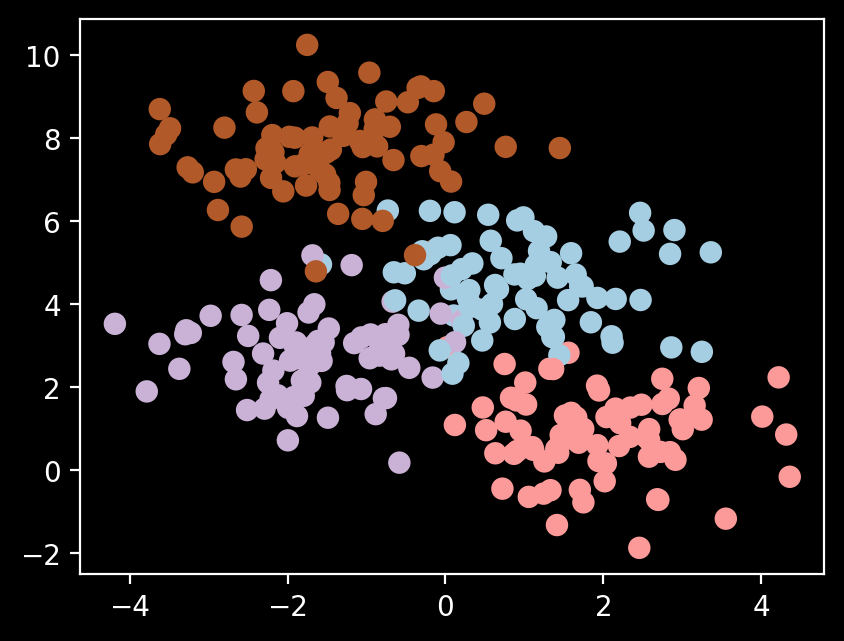

In [2]:
# HIDE CODE
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired);

In [3]:
# HIDE CODE
import numpy as np

def visualize_tree(estimator, X, y, boundaries=True, xlim=None, ylim=None):
    estimator.fit(X, y)

    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)
    plt.clim(y.min(), y.max())
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
    plt.axis('off')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    plt.clim(y.min(), y.max())
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i < 0:
            return

        tree = estimator.tree_
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-r')
            plot_boundaries(tree.children_left[i], [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i], [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-r')
            plot_boundaries(tree.children_left[i], xlim, [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim, [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

We use a custom function which generates a (static) plot of decision tree classifier with specified parameters.

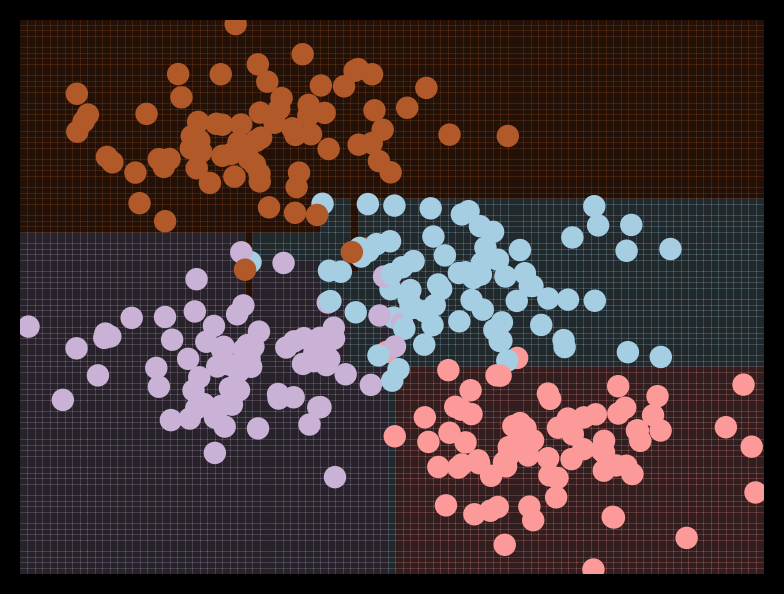

In [4]:
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier

# make data
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
# create model
clf = DecisionTreeClassifier()
# visualize boundaries of classifier with custom function
visualize_tree(clf, X, y, boundaries=False)

Create an interactive plot:

In [4]:
from ipywidgets import interactive

def interactive_tree(depth=1):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    visualize_tree(clf, X, y)
    plt.show()

interactive(interactive_tree, depth=(1, 5))

interactive(children=(IntSlider(value=1, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

Try changing the slider position and notice that at each increase in depth, every node is split in two except those nodes which contain only a single class.

## Overfitting

One issue with decision trees is that it is very easy to create trees which overfit the data. 

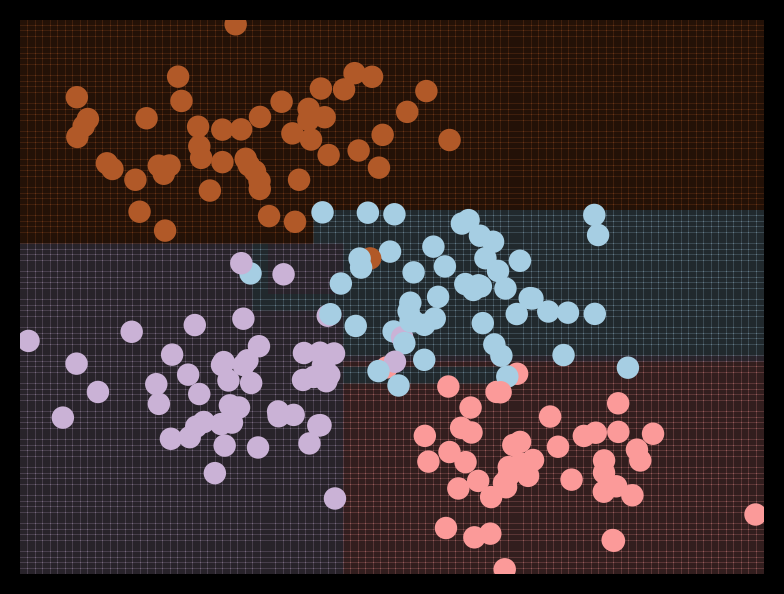

In [6]:
clf = DecisionTreeClassifier()

visualize_tree(clf, X[:200], y[:200], boundaries=False)

Subset of the last 200 data points

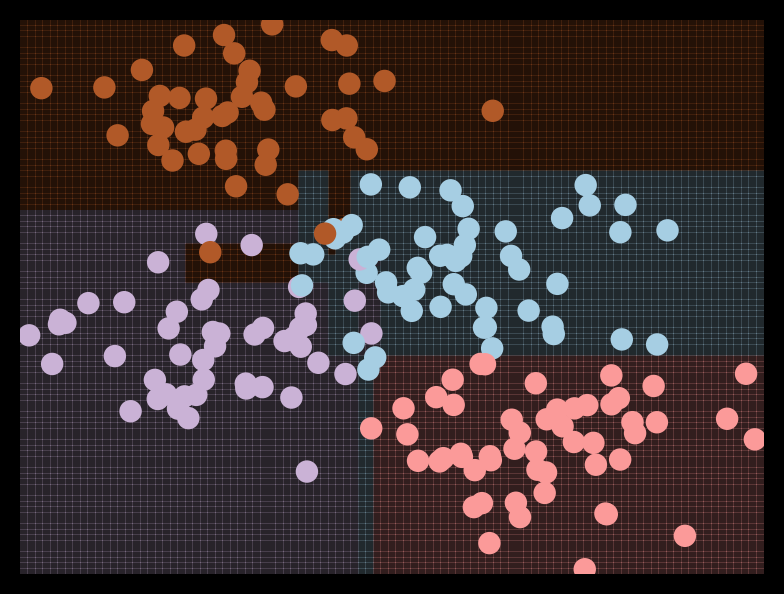

In [7]:
visualize_tree(clf, X[-200:], y[-200:], boundaries=False)

Note that the details of the classifications are very different which is an indication of overfitting: when you predict the value for a new point, the result is more reflective of the noise in the model rather than the signal.

## Ensemble of estimators

One possible way to address over-fitting is to use an ensemble method: 

- this is a meta-estimator which essentially averages the results of many individual estimators which over-fit the data. 
- Somewhat surprisingly, the resulting estimates are much more robust and accurate than the individual estimates which make them up.

One of the most common ensemble methods is the random forest, in which the ensemble is made up of many decision trees.

 Let's use an ensemble of estimators fit on subsets of the data. We can get an idea of what these might look like as follows:

In [8]:
# HIDE CODE
import numpy as np
from ipywidgets import interact, IntSlider

def fit_randomized_tree(random_state=0):
    X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False,
                   xlim=(X[:, 0].min(), X[:, 0].max()),
                   ylim=(X[:, 1].min(), X[:, 1].max()))
    plt.show()
    
interact(fit_randomized_tree, random_state=IntSlider(
    min=0, max=100, description='Random state', style={'description_width': 'auto'}, continuous_update=False
));

interactive(children=(IntSlider(value=0, continuous_update=False, description='Random state', style=SliderStyl…

Creating a decision tree:

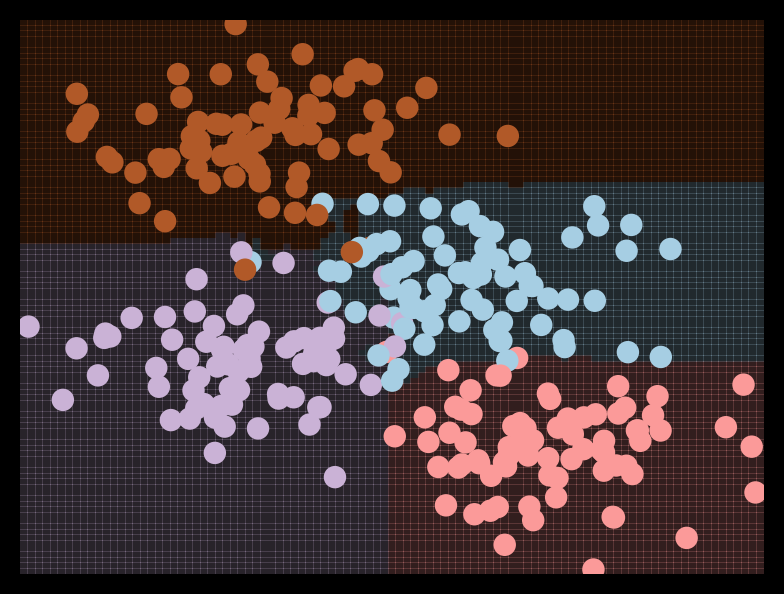

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)

visualize_tree(clf, X, y, boundaries=False);

By averaging over 100 randomly perturbed models, we end up with an overall model which is a much better fit to our data.

## Regression

Above we were considering random forests within the context of classification. Random forests can also be made to work in the case of regression (that is, continuous rather than categorical variables).


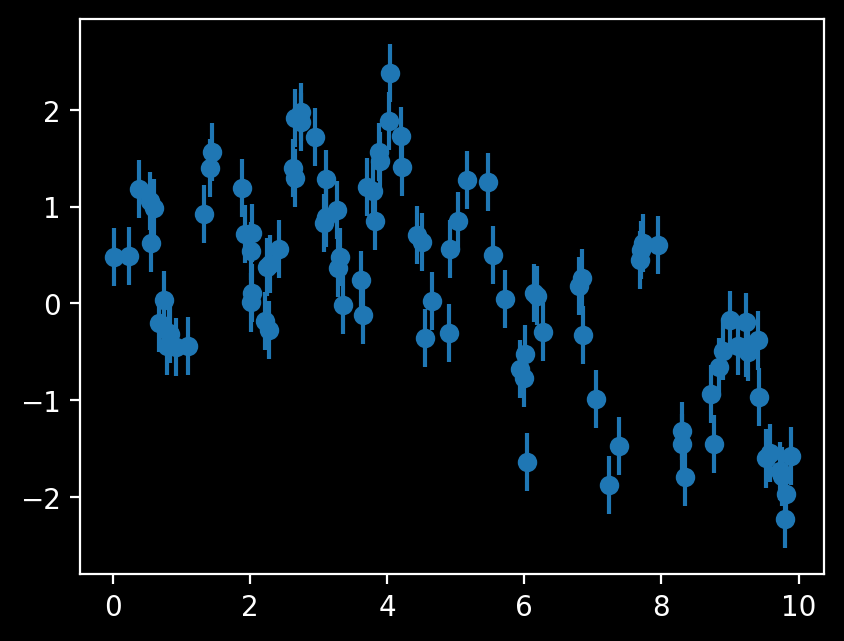

In [17]:
# HIDE CODE
# make data
x = 10 * np.random.rand(100)
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

y = model(x)
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o');

In [18]:
xfit = np.linspace(0, 10, 1000)

clf = RandomForestRegressor(100)
clf.fit(x[:, None], y)

yfit = clf.predict(xfit[:, None])

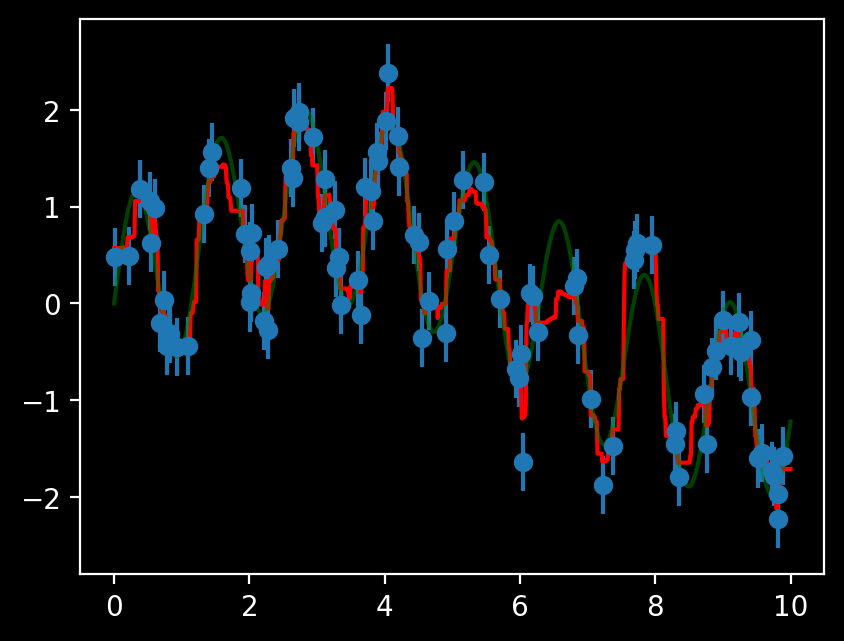

In [19]:
# HIDE CODE
plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-g', alpha=0.5);

As you can see, the non-parametric random forest model is flexible enough to fit the multi-period data, without us even specifying a multi-period model!

## Hand written digits

### Data

In [20]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [21]:
X = digits.data
y = digits.target

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


The data in digits.images is a 1797x8x8 array, with each pixel value within an 8x8 grid:

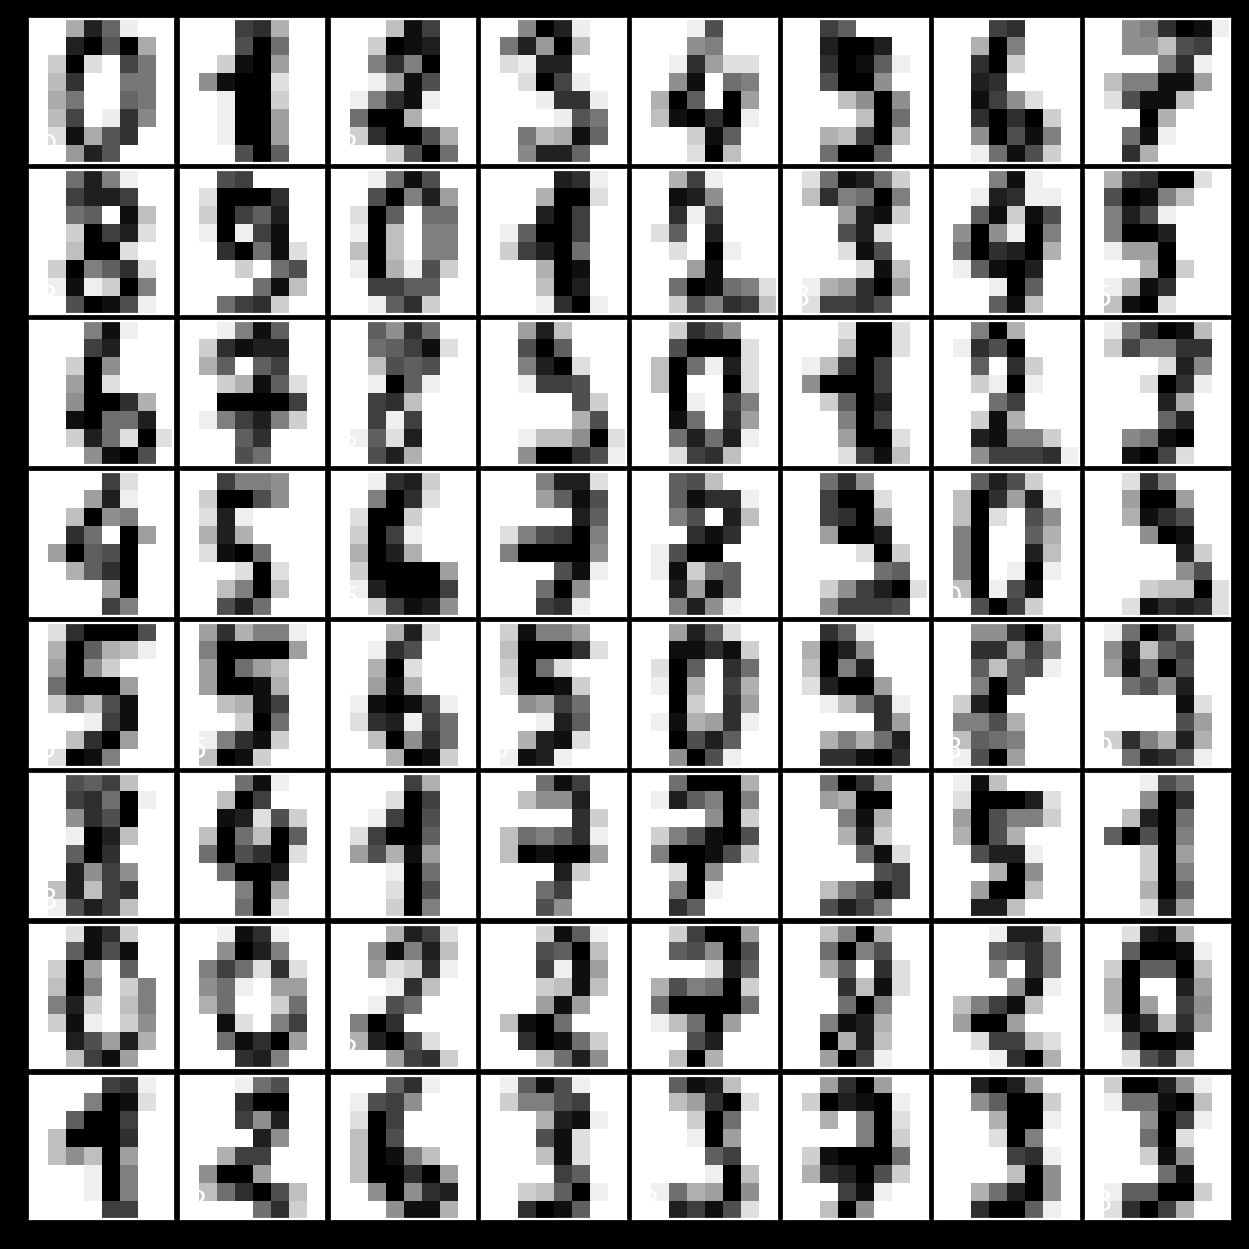

In [22]:
# HIDE CODE
# Set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### Model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(max_depth=11)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Model accuracy: {metrics.accuracy_score(y_pred, y_test)}")

Model accuracy: 0.8488888888888889


### Confusion matrix

Finally, for good measure, let's plot the confusion matrix, where each row represents the true label of the sample, while each column represents the predicted label.

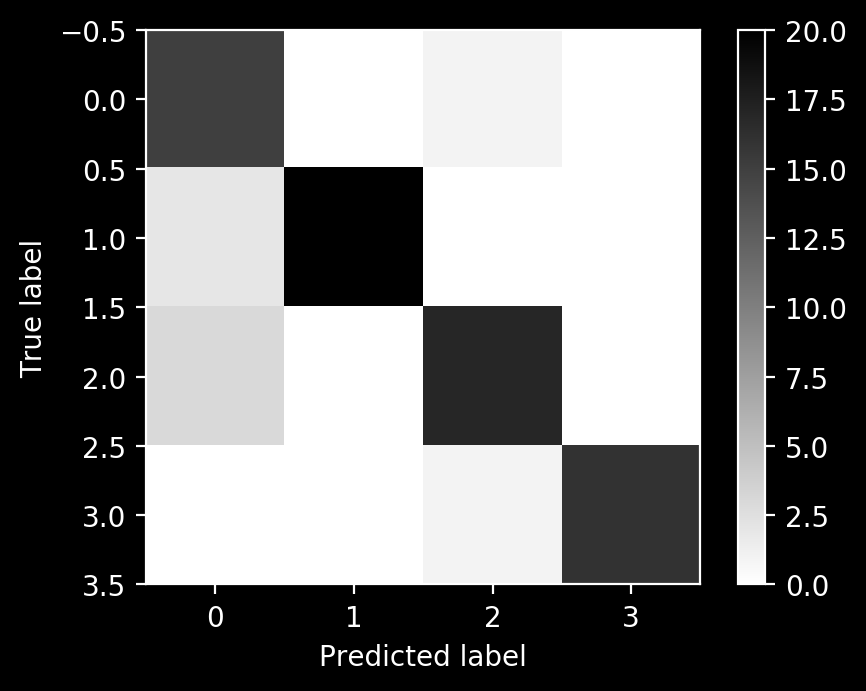

In [8]:
plt.imshow(metrics.confusion_matrix(y_pred, y_test), cmap='binary', interpolation='nearest')
plt.grid(False)
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label");